### NOTEBOOK CONTENTS


#### Production of .nc documentation is found in: carbon_dev/PI_CARBON_PAPER/location_important_extracted_calculated_quantities.txt

#### These are calculated using OmAs that were calculated using the in-situ depth.

In [22]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [23]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [24]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp
import warnings
warnings.filterwarnings('ignore')

import pickle

import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

from salishsea_tools import visualisations as vis

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
import arrow
import gsw
%matplotlib inline

import xarray as xr
from datetime import datetime
from salishsea_tools import grid_tools, viz_tools




Text(0.5, 0.98, 'MASK of regions, input file')

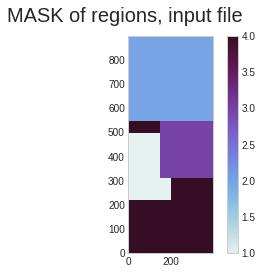

In [25]:
mask = np.zeros([40,898,398])
mask[:] = 4
for y in range(0,898):
    for x in range(0,398):
        #jdf
        if  (x <200) & (y>220) & (y<500) :
            mask[:,y,x] = 1
            #nsog
        if  (y >= 550) :
            mask[:,y,x] = 2
            # s sog
        if (x> 150) & (y>310) & (y<550) :
            mask[:,y,x] = 3

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(mask[0,:,:], cmap=cm.cm.dense)
fig.colorbar(mesh)
plt.suptitle('MASK of regions, input file',fontsize=20)


# Deep algorithm
#### Saturation horizon is below all supersaturated water....
    first_proper_undersat = np.min(t_indar[t_indar>max_supsat])
    Saturation horizon is below all supersaturated water....

In [26]:
OmA_deepAlg = { 'LA': {'JdF': 'value_1', 'N. Sog': 'value_1', 'S. Sog': 'value_1', 'Haro': 'value_1'},
                'BR': {'JdF': 'value_1', 'N. Sog': 'value_1', 'S. Sog': 'value_1', 'Haro': 'value_1'},
                'PI': {'JdF': 'value_1', 'N. Sog': 'value_1', 'S. Sog': 'value_1', 'Haro': 'value_1'}}

#LA
Oma_hor_deep_LA = nc.Dataset('../KEY_OMA/OMA_current_NCS/LA_OmA_horizon_DEEPALG.nc')
OmArHORIZON_la_deepalg =  Oma_hor_deep_LA['model_output']['OmAr_HORIZON'][90,:,:]

OmA_h_janfeb_la_deepalg =  np.array(Oma_hor_deep_LA['model_output']['OmAr_HORIZON'][0:60,:,:])
OmA_h_dec_la_deepalg =  np.array(Oma_hor_deep_LA['model_output']['OmAr_HORIZON'][364-60:-1,:,:])
OmA_h_winter_la_deepalg =  np.concatenate([OmA_h_janfeb_la_deepalg,OmA_h_dec_la_deepalg])
OmA_h_summer_la_deepalg =  np.array(Oma_hor_deep_LA['model_output']['OmAr_HORIZON'][134:243,:,:])

OmA_h_summer_mean_la_deepalg =  np.nanmean(OmA_h_summer_la_deepalg,axis = 0)
OmA_h_winter_mean_la_deepalg =  np.nanmean(OmA_h_winter_la_deepalg,axis = 0)

#BR
Oma_hor_deep_BR = nc.Dataset('../KEY_OMA/OMA_current_NCS/BR_OmA_horizon_DEEPALG.nc')
OmArHORIZON_br_deepalg =  Oma_hor_deep_BR['model_output']['OmAr_HORIZON'][90,:,:]

OmA_h_janfeb_br_deepalg =  np.array(Oma_hor_deep_BR['model_output']['OmAr_HORIZON'][0:60,:,:])
OmA_h_dec_br_deepalg =  np.array(Oma_hor_deep_BR['model_output']['OmAr_HORIZON'][364-60:-1,:,:])
OmA_h_winter_br_deepalg =  np.concatenate([OmA_h_janfeb_br_deepalg,OmA_h_dec_br_deepalg])
OmA_h_summer_br_deepalg =  np.array(Oma_hor_deep_BR['model_output']['OmAr_HORIZON'][134:243,:,:])

OmA_h_winter_mean_br_deepalg =  np.nanmean(OmA_h_winter_br_deepalg,axis = 0)
OmA_h_summer_mean_br_deepalg =  np.nanmean(OmA_h_summer_br_deepalg,axis = 0)

##PI
Oma_hor_deep_PI = nc.Dataset('../KEY_OMA/OMA_current_NCS/PI_OmA_horizon_DEEPALG.nc')
OmArHORIZON_PI_deepalg =  Oma_hor_deep_PI['model_output']['OmAr_HORIZON'][90,:,:]

OmA_h_janfeb_PI_deepalg =  np.array(Oma_hor_deep_PI['model_output']['OmAr_HORIZON'][0:60,:,:])
OmA_h_dec_PI_deepalg =  np.array(Oma_hor_deep_PI['model_output']['OmAr_HORIZON'][364-60:-1,:,:])
OmA_h_winter_PI_deepalg =  np.concatenate([OmA_h_janfeb_PI_deepalg,OmA_h_dec_PI_deepalg])
OmA_h_summer_PI_deepalg =  np.array(Oma_hor_deep_PI['model_output']['OmAr_HORIZON'][134:243,:,:])

OmA_h_summer_mean_PI_deepalg =  np.nanmean(OmA_h_summer_PI_deepalg,axis = 0)
OmA_h_winter_mean_PI_deepalg =  np.nanmean(OmA_h_winter_PI_deepalg,axis = 0)



In [27]:


#

OmA_deepAlg_summer = { 'la': {'JdF': 0, 'N. Sog': 0, 'S. Sog': 0, 'Haro': 0},
                      'PI': {'JdF': 0, 'N. Sog': 0, 'S. Sog': 0, 'Haro': 0},
                'BR': {'JdF': 0, 'N. Sog': 0, 'S. Sog': 0, 'Haro': 0}}
OmA_deepAlg_winter = { 'la': {'JdF': 0, 'N. Sog': 0, 'S. Sog': 0, 'Haro': 0},
                      'PI': {'JdF': 0, 'N. Sog': 0, 'S. Sog': 0, 'Haro': 0},
                'BR': {'JdF': 0, 'N. Sog': 0, 'S. Sog': 0, 'Haro': 0}}


reg = ['JdF','N. Sog','S. Sog','Haro']
for i in range(1,5):
    
    surf_mask = mask[0,:,:]
    
    reg_mask = np.where(surf_mask == i)
    #print('')
    #print(reg[i-1])
    
    summer_shoal = (OmA_h_summer_mean_la_deepalg - OmA_h_summer_mean_br_deepalg)
    #print('average summer sat. hor. (la): ', np.nanmean(OmA_h_summer_mean_la_deepalg[reg_mask]))
    OmA_deepAlg_summer['la'][reg[i-1]] = np.nanmean(OmA_h_summer_mean_la_deepalg[reg_mask])
    #print('average summer sat. hor (BR): ', np.nanmean(OmA_h_summer_mean_br_deepalg[reg_mask]))
    OmA_deepAlg_summer['BR'][reg[i-1]] = np.nanmean(OmA_h_summer_mean_br_deepalg[reg_mask])
    #print('la-BR shoaling summer: ', np.nanmean(summer_shoal[reg_mask]))
    
    winter_shoal = (OmA_h_winter_mean_la_deepalg - OmA_h_winter_mean_br_deepalg)
    #print('average winter sat. hor. (la): ', np.nanmean(OmA_h_winter_mean_la_deepalg[reg_mask]))
    OmA_deepAlg_winter['la'][reg[i-1]] = np.nanmean(OmA_h_winter_mean_la_deepalg[reg_mask])
    #print('average winter sat. hor (BR): ', np.nanmean(OmA_h_winter_mean_br_deepalg[reg_mask]))
    OmA_deepAlg_winter['BR'][reg[i-1]] = np.nanmean(OmA_h_winter_mean_br_deepalg[reg_mask])
    #print('la-BR shoaling winter: ', np.nanmean(winter_shoal[reg_mask]))
    

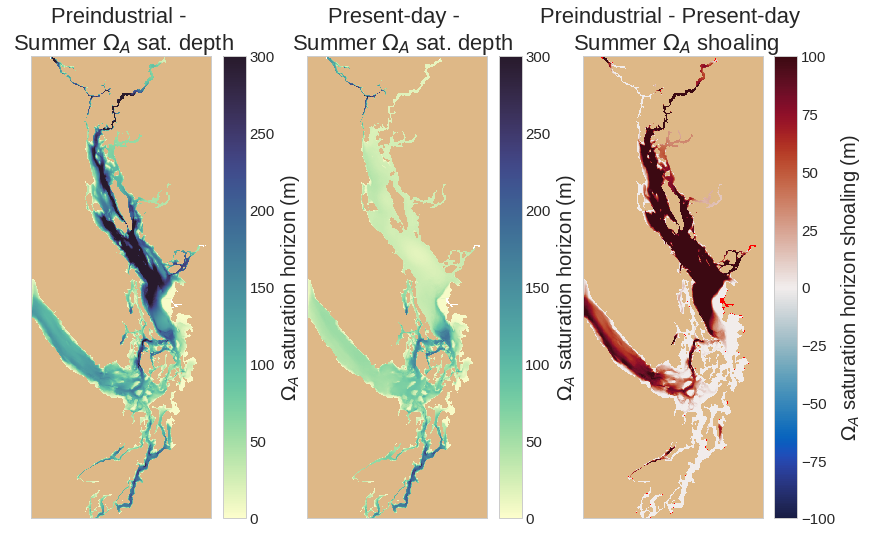

In [28]:
#PI_BR_summer_shoaling = (OmA_h_summer_mean_PI_deepalg-OmA_h_summer_mean_br_deepalg)

fig = plt.figure(figsize=(14*1,8.5*1))

ax1 = fig.add_subplot(1,3,1)
cmap = cm.cm.deep
tplt = OmA_h_summer_mean_PI_deepalg
viz_tools.set_aspect(ax1)
mesh = ax1.pcolormesh(tplt, cmap=cm.cm.deep, vmin=0, vmax=300)
viz_tools.plot_land_mask(ax1, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
cbar = plt.colorbar(mesh)

ax1.set_title('Preindustrial - \n Summer $\Omega_A$ sat. depth ', fontsize = 22)
plt.xticks([])
plt.yticks([])
cbar.ax.tick_params(labelsize=15)
cbar.set_label('$\Omega_A$ saturation horizon (m)', fontsize = 20)

ax2 = fig.add_subplot(1,3,2)
cmap = cm.cm.deep
tplt = OmA_h_summer_mean_br_deepalg
viz_tools.set_aspect(ax2)
mesh = ax2.pcolormesh(tplt, cmap=cm.cm.deep, vmin=0, vmax=300)
viz_tools.plot_land_mask(ax2, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
cbar = plt.colorbar(mesh)
ax2.set_title('Present-day - \n  Summer $\Omega_A$ sat. depth ', fontsize = 22)
plt.xticks([])
plt.yticks([])
cbar.ax.tick_params(labelsize=15)
cbar.set_label('$\Omega_A$ saturation horizon (m)', fontsize = 20)

ax3 = fig.add_subplot(1,3,3)
cmap = cm.cm.balance
tplt = OmA_h_summer_mean_PI_deepalg - OmA_h_summer_mean_br_deepalg
viz_tools.set_aspect(ax3)
mesh = ax3.pcolormesh(tplt, cmap=cm.cm.balance, vmin=-100, vmax=100)
viz_tools.plot_land_mask(ax3, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
ax3.set_title('Preindustrial - Present-day \n Summer $\Omega_A$ shoaling', fontsize = 22)
cbar = plt.colorbar(mesh)
plt.xticks([])
plt.yticks([])
cbar.ax.tick_params(labelsize=15)
cbar.set_label('$\Omega_A$ saturation horizon shoaling (m)', fontsize = 20)

cmap.set_bad('red')
cmap.set_bad('red')


In [29]:
reg_mask = np.where((surf_mask == 1) | (surf_mask == 2) | (surf_mask == 3))

OmA_h_summer_mean_PI_noharo = OmA_h_summer_mean_PI_deepalg[reg_mask]
OmA_h_summer_mean_br_noharo = OmA_h_summer_mean_br_deepalg[reg_mask]

PI_BR_summer_shoaling = (OmA_h_summer_mean_PI_deepalg-OmA_h_summer_mean_br_deepalg)
print('mean, std of domain shoaling- summer')
print(np.nanmean(PI_BR_summer_shoaling))
print(np.nanstd(PI_BR_summer_shoaling))

print('mean, std of domain shoaling when taking out haro -summer ')

PI_BR_summer_shoal_noharo = (OmA_h_summer_mean_PI_noharo-OmA_h_summer_mean_br_noharo)
print(np.nanmean(PI_BR_summer_shoal_noharo))
print(np.nanstd(PI_BR_summer_shoal_noharo))

reg_mask = np.where((surf_mask == 1) | (surf_mask == 2) | (surf_mask == 3))

OmA_h_winter_mean_PI_noharo = OmA_h_winter_mean_PI_deepalg[reg_mask]
OmA_h_winter_mean_br_noharo = OmA_h_winter_mean_br_deepalg[reg_mask]

PI_BR_winter_shoaling = (OmA_h_winter_mean_PI_deepalg-OmA_h_winter_mean_br_deepalg)
print('mean, std of domain shoaling- winter')
print(np.nanmean(PI_BR_winter_shoaling))
print(np.nanstd(PI_BR_winter_shoaling))

print('mean, std of domain shoaling when taking out haro -winter ')

PI_BR_winter_shoal_noharo = (OmA_h_winter_mean_PI_noharo-OmA_h_winter_mean_br_noharo)
print(np.nanmean(PI_BR_winter_shoal_noharo))
print(np.nanstd(PI_BR_winter_shoal_noharo))

mean, std of domain shoaling- summer
67.47732
94.48349
mean, std of domain shoaling when taking out haro -summer 
87.327995
101.0825
mean, std of domain shoaling- winter
70.04699
98.98334
mean, std of domain shoaling when taking out haro -winter 
93.44134
105.26029


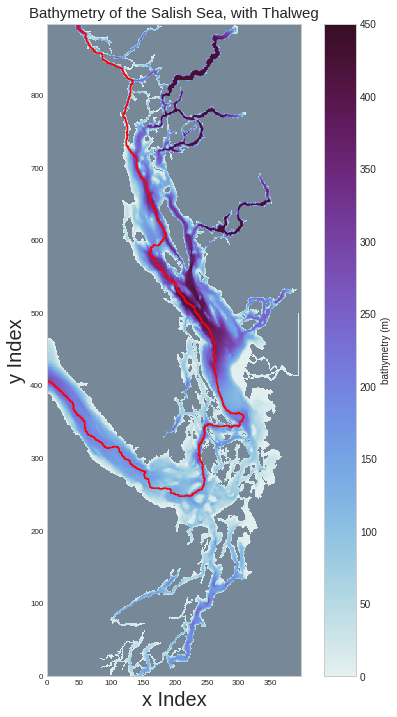

In [30]:
## map of bathymetry
bath = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
bath1 = bath.variables['Bathymetry']

def plot_bathy(surfdat_1,tit1,t_cmap,xsize,ysize,v_min1,v_max1,cl1,bigtit):

    fig, ax = plt.subplots(1, 1, figsize=(xsize, ysize), sharey=True)
    cmap = t_cmap

    tplt = np.ma.masked_values(surfdat_1,0)
    ax.set_title(tit1,fontsize = 15 )
    v_min = v_min1
    v_max = v_max1
    clabel = cl1

    viz_tools.set_aspect(ax)
    mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max) 
    ax.set_xlabel('x Index', fontsize = 20 )
    ax.set_ylabel('y Index', fontsize = 20 )

    plt.xlim([0,398])
    plt.ylim([0,898])
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    cmap.set_bad('lightslategray')
    plt.suptitle(bigtit,fontsize=20)
    cbar = plt.colorbar(mesh)
    cbar.set_label(clabel)
    
    #plot thalweg?
    lines = np.loadtxt('/home/sallen/MEOPAR/Tools/bathymetry/thalweg_working.txt', delimiter=" ", unpack=False)
    lines = lines.astype(int)

    ax.plot(lines[:,1], lines[:,0], 'r')
fact = 0.4
plot_bathy(bath1,'Bathymetry of the Salish Sea, with Thalweg', \
               cm.cm.dense,20*fact,30*fact,0,450,'bathymetry (m)','')

In [31]:
# BR_oma = nc.Dataset('../KEY_OMA/OMA_current_NCS/BR_OmA.nc')
# BR_summer = np.mean(BR_oma['model_output']['OmA'][134:243,:,:,:],axis = 0)
# print(np.shape(BR_summer))
# PI_oma = nc.Dataset('../KEY_OMA/OMA_current_NCS/PI_OmA.nc')
# PI_summer = np.mean(PI_oma['model_output']['OmA'][134:243,:,:,:],axis = 0)


In [32]:
#pickle.dump(BR_summer, open("BR_summer_OmA_mean.pkl", 'wb'))
#pickle.dump(PI_summer, open("PI_summer_OmA_mean.pkl", 'wb'))
f = open('./BR_summer_OmA_mean.pkl', 'rb')
BR_summer_OmA_mean = pickle.load(f) 
f = open('./PI_summer_OmA_mean.pkl', 'rb')
PI_summer_OmA_mean = pickle.load(f) 

Text(0.5, 0, '')

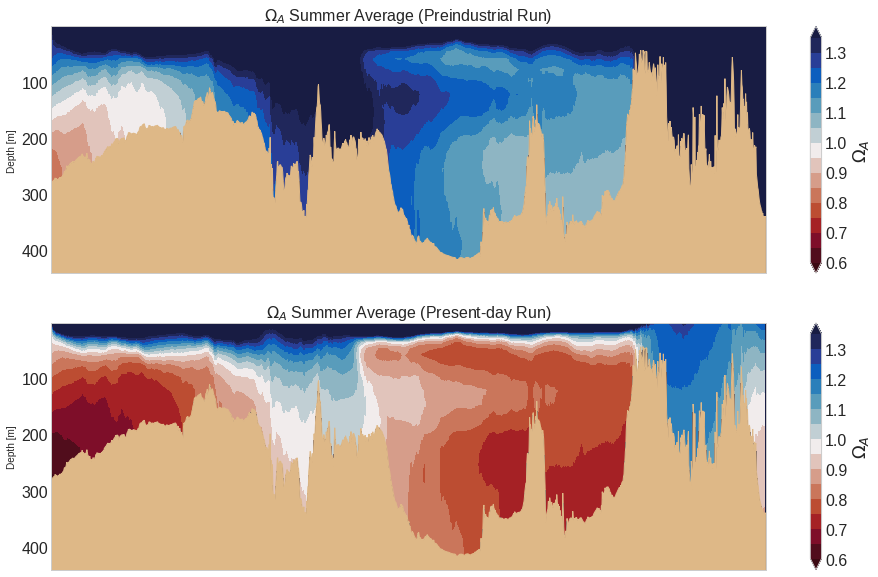

In [33]:
bathy = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(16,10))
cbar = vis.contour_thalweg(ax1, PI_summer_OmA_mean, bathy, mesh, np.arange(0.6, 1.4, 0.05), cmap = cm.cm.balance_r)
ax1.set_title('$\Omega_A$ Summer Average (Preindustrial Run)', fontsize = 16)
cbar.ax.tick_params(labelsize=16) 
cbar.set_label('$\Omega_A$', fontsize = 18)
ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.set_xticklabels([])
ax1.set_xlabel('')

cbar = vis.contour_thalweg(ax2, BR_summer_OmA_mean, bathy, mesh, np.arange(0.6, 1.4, 0.05), cmap = cm.cm.balance_r)
ax2.set_title('$\Omega_A$ Summer Average (Present-day Run)', fontsize = 16)
cbar.ax.tick_params(labelsize=16) 
cbar.set_label('$\Omega_A$', fontsize = 18)
ax2.tick_params(axis='both', which='major', labelsize=16)
ax2.set_xticklabels([])
ax2.set_xlabel('')

Text(0.5, 0, '')

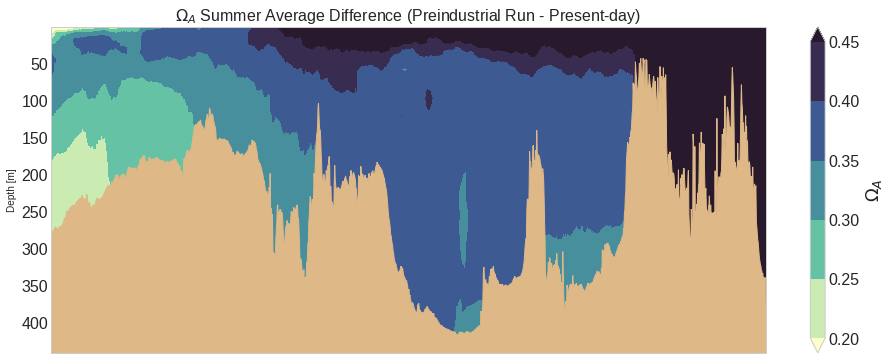

In [34]:
bathy = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')

fig, (ax1) = plt.subplots(1,1,figsize=(16,6))
cbar = vis.contour_thalweg(ax1, PI_summer_OmA_mean-BR_summer_OmA_mean, bathy, mesh, np.arange(0.2, 0.5, 0.05), cmap = cm.cm.deep)
ax1.set_title('$\Omega_A$ Summer Average Difference (Preindustrial Run - Present-day)', fontsize = 16)
cbar.ax.tick_params(labelsize=16) 
cbar.set_label('$\Omega_A$', fontsize = 18)
ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.set_xticklabels([])
ax1.set_xlabel('')



In [35]:
# import pickle
#pickle.dump(OmA_deepAlg_summer,'Oma_summer_new.pkl','wb')


## put this in bar-plot form?

In [36]:
# fx = 13
# fy = 4
# tstn = 'SE'
# fig = plt.figure(figsize=(10,4))
# ax = fig.add_subplot(1,2,1)
# index = np.arange(4)
# bar_width = 0.2
# opacity = 0.8


# rects1 = plt.bar(index+0.4, means_deep_summer_la - means_deep_summer_BR, bar_width,
# alpha=opacity,
# color='dimgrey',
# label='LA - BR SHOALING')
# rects1 = plt.bar(index+0.6, means_deep_summer_PI - means_deep_summer_BR, bar_width,
# alpha=opacity,
# color='cornflowerblue',
# label='PI - BR SHOALING')

# plt.ylim([-5,120])
# plt.legend(loc='best')
# plt.xticks(index + bar_width, (reg[0], reg[1], reg[2], reg[3]))
# ax.set_title('SUMMER SHOALING', fontsize = 20)


# ax = fig.add_subplot(1,2,2)
# index = np.arange(4)
# bar_width = 0.2
# opacity = 0.8


# rects1 = plt.bar(index+0.4, means_deep_winter_la - means_deep_winter_BR, bar_width,
# alpha=opacity,
# color='dimgrey',
# label='LA - BR SHOALING')
# rects1 = plt.bar(index+0.6, means_deep_winter_PI - means_deep_winter_BR, bar_width,
# alpha=opacity,
# color='cornflowerblue',
# label='PI - BR SHOALING')

# plt.ylim([-5,120])

# plt.xticks(index + bar_width, (reg[0], reg[1], reg[2], reg[3]))
# ax.set_title('WINTER SHOALING', fontsize = 20)
